# **Séries Temporais com DeepAR**

## Tratamento da Base de Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os

In [3]:
base = pd.read_csv('train.csv')
base.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
base = pd.read_csv('train.csv', parse_dates=['datetime'], index_col=0)
base

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [5]:
base.drop(columns=['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered'], axis=1, inplace=True)
base

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168


In [6]:
base = base.groupby(pd.Grouper(freq='D')).sum()
base

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


In [7]:
base_teste = base.copy()
base_teste.shape

(719, 1)

In [8]:
base_treinamento = base.iloc[0:689,:]
base_treinamento

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-11-15,5445
2012-11-16,5698
2012-11-17,5629


In [9]:
dt_data_inicial = pd.Timestamp('2011-01-01')
dt_data_final_treinamento = pd.Timestamp('2012-11-19')
dt_previsao_maxima = pd.Timestamp('2012-12-19')

faixa_treinamento = (dt_data_inicial, dt_data_final_treinamento)
faixa_teste = (dt_data_inicial, dt_previsao_maxima)

In [10]:
faixa_treinamento

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-11-19 00:00:00'))

In [11]:
faixa_teste

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 00:00:00'))

In [12]:
serie_temporal_treinamento = []
serie_temporal_teste = []

serie_temporal_treinamento.append(base_treinamento[faixa_treinamento[0]:faixa_treinamento[1]]['count'])
serie_temporal_teste.append(base_teste[faixa_teste[0]:faixa_teste[1]]['count'])

In [13]:
type(serie_temporal_teste), type(serie_temporal_treinamento)

(list, list)

In [14]:
serie_temporal_treinamento

[datetime
 2011-01-01     985
 2011-01-02     801
 2011-01-03    1349
 2011-01-04    1562
 2011-01-05    1600
               ... 
 2012-11-15    5445
 2012-11-16    5698
 2012-11-17    5629
 2012-11-18    4669
 2012-11-19    5499
 Freq: D, Name: count, Length: 689, dtype: int64]

In [15]:
serie_temporal_teste

[datetime
 2011-01-01     985
 2011-01-02     801
 2011-01-03    1349
 2011-01-04    1562
 2011-01-05    1600
               ... 
 2012-12-15    5047
 2012-12-16    3786
 2012-12-17    4585
 2012-12-18    5557
 2012-12-19    5267
 Freq: D, Name: count, Length: 719, dtype: int64]

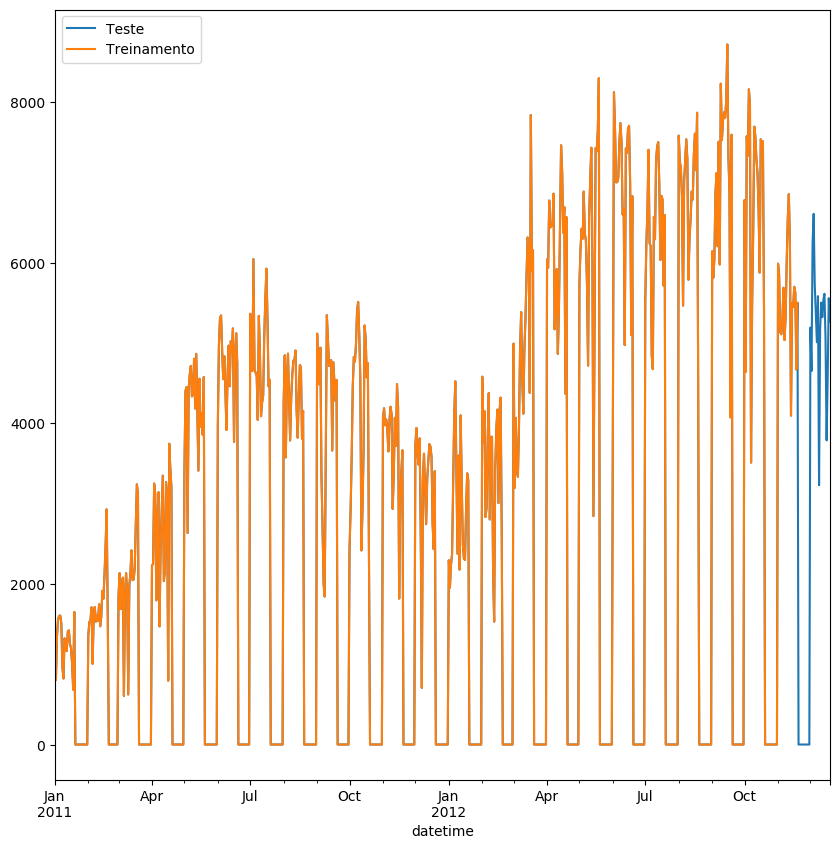

In [16]:
plt.figure(figsize=(10,10))
serie_temporal_teste[0].plot(label="Teste")
serie_temporal_treinamento[0].plot(label="Treinamento")
plt.legend()
plt.show()

In [17]:
def encode_target(ts):
    return [x if np.isfinite(x) else "NaN" for x in ts]

In [18]:
encode_target(serie_temporal_treinamento[0][0:25])

[985,
 801,
 1349,
 1562,
 1600,
 1606,
 1510,
 959,
 822,
 1321,
 1263,
 1162,
 1406,
 1421,
 1248,
 1204,
 1000,
 683,
 1650,
 0,
 0,
 0,
 0,
 0,
 0]

In [19]:
def series_to_obj(ts):
    obj = {"start": str(ts.index[0]), "target": encode_target(ts)}
    return obj

In [20]:
series_to_obj(serie_temporal_treinamento[0][0:5])

{'start': '2011-01-01 00:00:00', 'target': [985, 801, 1349, 1562, 1600]}

In [21]:
def series_to_jsonline(ts):
    return json.dumps(series_to_obj(ts))

In [22]:
series_to_jsonline(serie_temporal_treinamento[0][0:5])

'{"start": "2011-01-01 00:00:00", "target": [985, 801, 1349, 1562, 1600]}'

In [23]:
encoding = 'utf-8'
arquivo_json_treinamento = 'train.json'
arquivo_json_teste = 'test.json'
with open(arquivo_json_treinamento, 'wb') as fp:
    for ts in serie_temporal_treinamento:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

with open(arquivo_json_teste, 'wb') as fp:
    for ts in serie_temporal_teste:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

## Configurações do SageMaker

In [24]:
import sagemaker
import boto3
from sagemaker import Session
import sagemaker.amazon.common as smac
import io
import os

In [25]:
session = sagemaker.Session()
bucket = 'praticaawssagemaker'
subpasta_modelo = 'modelos/bike/deepar'
subpasta_dataset = 'datasets/bike'
job_name = 'deepar-bike'
role = sagemaker.get_execution_role()
s3_train_data = f's3://{bucket}/{subpasta_dataset}/train/train.json'
s3_test_data = f's3://{bucket}/{subpasta_dataset}/test/test.json'
output_location = f's3://{bucket}/{subpasta_modelo}/output'

print(f'Localização da base de treinamento: {s3_train_data}')
print(f'Localização da base de treinamento: {s3_test_data}')
print(f'Modelo final será salvo em: {output_location}')

Localização da base de treinamento: s3://praticaawssagemaker/datasets/bike/train/train.json
Localização da base de treinamento: s3://praticaawssagemaker/datasets/bike/test/test.json
Modelo final será salvo em: s3://praticaawssagemaker/modelos/bike/deepar/output


In [26]:
def escreve_s3(arquivo, bucket, nome):
    with open(arquivo, 'rb') as f:
        return boto3.Session().resource('s3').Bucket(bucket).Object(nome).upload_fileobj(f)

In [27]:
escreve_s3('train.json', bucket, os.path.join(subpasta_dataset, 'train', 'train.json'))
escreve_s3('test.json', bucket, os.path.join(subpasta_dataset, 'test', 'test.json'))

## Treinamento do DeepAR

In [28]:
container = sagemaker.image_uris.retrieve(
    framework='forecasting-deepar', region=boto3.Session().region_name
)

In [29]:
deepar = sagemaker.estimator.Estimator(
    image_uri=container, role=role, instance_count=1, 
    instance_type='ml.m5.xlarge', output_path=output_location, sagemaker_session=session,
    base_job_name=job_name, use_spot_instances=True, 
    max_run=3600, max_wait=3600
)

/opt/conda/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [30]:
freq = 'D'
prediction_length = 30
context_length = 30

In [31]:
hyperparametros ={
    'time_freq': freq,
    'epochs': '20',
    'context_length': str(context_length),
    'prediction_length': str(prediction_length)
}

In [32]:
deepar.set_hyperparameters(**hyperparametros)

In [33]:
data_channels = {'train': s3_train_data, 'test': s3_test_data}
data_channels

{'train': 's3://praticaawssagemaker/datasets/bike/train/train.json',
 'test': 's3://praticaawssagemaker/datasets/bike/test/test.json'}

In [34]:
deepar.fit(inputs=data_channels)

INFO:sagemaker:Creating training-job with name: deepar-bike-2023-10-30-18-30-26-678


2023-10-30 18:30:26 Starting - Starting the training job...
2023-10-30 18:30:41 Starting - Preparing the instances for training.........
2023-10-30 18:31:58 Downloading - Downloading input data...
2023-10-30 18:32:29 Training - Downloading the training image......
2023-10-30 18:33:34 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
Running custom environment configuration script
/opt/amazon/lib/python3.7/site-packages/jsonref.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping, Sequence
[10/30/2023 18:33:47 INFO 139992659949376] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'_kvstore': 'auto', '_num_gpus': 'auto', '_num_kv_servers': 'auto